# Accelerated Douglas Rachford Splitting

This notebook provides the code for drawing worst-case performance of an accelerated Douglas Rachford Splitting, and comparing it to its theoretical guarantee. This code returns the figures from the paper [...].

More precisely, the following composite convex minimization problem is considered
\begin{equation}
    F_\star \triangleq \min_x \{F(x) \equiv f_1(x) + f_2(x)\},
\end{equation}
where $f_1$ is closed proper and convex, and $f_2$ is $\mu$-strongly convex and $L$-smooth.

The package PEPit allows to compute a worst-case guarantee for **accelerated Douglas Rachford**. That is, it computes the smallest possible $\tau(n, L, \mu, \alpha)$ such that the following guarantee holds
\begin{equation}
F(y_n) - F(x_\star) \leqslant \tau(n, L, \mu, \alpha) \| w_0 - w_\star \|^2,
\end{equation}
where $\alpha$ is a parameter of the method, and where $y_n$ is the output of the accelerated Douglas Rachford Splitting method, where $x_\star$ is a minimizer of $F$, and $w_\star$ defined such that
\begin{equation}
x_\star = \text{prox}_{\alpha f_2}(w_\star)
\end{equation}
is an optimal point.

#### Algorithm

Accelerated Douglas Rachford Splitting may be described as follows, for $t \in \{0,1, \ldots, n-1\}$
\begin{equation}
    \begin{aligned}
        x_t     &= \mathrm{prox}_{\alpha f_2}(u_t), \\
        y_t     &= \mathrm{prox}_{\alpha f_1}(2x_t - u_t), \\
        w_{t+1} &= u_t +\theta (y_t - x_t), \\
        u_{t+1} &= \left\{\begin{array}{ll} w_{t+1}+\frac{t-1}{t+2}(w_{t+1}-w_t)\, & \mbox{if } t \geqslant 1,\\
                w_{t+1} & \mbox{otherwise,} \end{array} \right.
    \end{aligned}
\end{equation}

#### Theoretical guarantee

There is no theoretical guarantee for this method beyond quadratic minimization. For quadratics, an **upper** bound is 
\begin{equation}
    F(y_n) - F_\star \leqslant  \frac{2\|x_0 - w_\star\|^2_2}{\alpha \theta(n+3)^2},
\end{equation}
when $\theta = \frac{1 - \alpha L}{1 + \alpha L}$ and $\alpha < \frac{1}{L}$.

## Imports

First, we include the right python imports, including commmon packages and the function returning worst-case performance of gradient descent in contraction.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import PEPit

# import accelerated Douglas Rachford Splitting from the toolbox
import PEPit.examples.composite_convex_minimization.accelerated_douglas_rachford_splitting as inADRS

# Set the verbose parameter to False to return worst-case without details
verbose = False

## Worst-case as a function of the iteration count

In [7]:
# Set the parameters

L = 1          # smoothness parameter
mu = 0.1       # strong-convexity parameter
gamma = 1 / L  # step size
alpha = 0.9

# Set a list of iteration counter to test
ns = np.array([1, 2, 4, 6, 8, 10, 15])#, 20, 30, 40, 50])


# Compute worst-case and theoretical guarantee for each iteration count
pepit_taus = np.zeros(len(ns))
theoretical_taus = np.zeros(len(ns))
for i in range(len(ns)):
    pepit_taus[i], theoretical_taus[i] = inADRS.wc_accelerated_douglas_rachford_splitting(mu=mu, 
                                                                                          L=L, 
                                                                                          alpha=alpha, 
                                                                                          n=ns[i], 
                                                                                          verbose=verbose)


## Plot

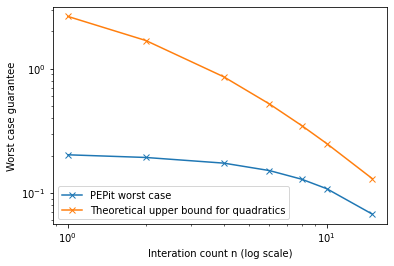

In [10]:
# Plot theoretical and PEPit worst-case performance as a function of the iteration count
plt.plot(ns, pepit_taus, label='PEPit worst case', marker='x')
plt.plot(ns, theoretical_taus, label='Theoretical upper bound for quadratics', marker='x')

plt.semilogy()
plt.semilogx()
plt.legend()
plt.xlabel('Interation count n (log scale)')
plt.ylabel('Worst case guarantee')

plt.show()